In [32]:
# visualize_benchmark.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import re

In [33]:
# Lire les résultats
df = pd.read_csv("results.csv")

In [34]:
# Remplacer les "timeout" par 300 secondes pour affichage
df["time"] = df["time"].replace("timeout", 300).astype(float)

In [35]:
# Extraire la taille depuis le nom du benchmark (ex: "3x3", "4x4", etc.)
def extract_size(name):
    match = re.search(r"\b[3-9]x[3-9]\b", name)
    return match.group(0) if match else "unknown"

df["size"] = df["benchmark"].apply(extract_size)

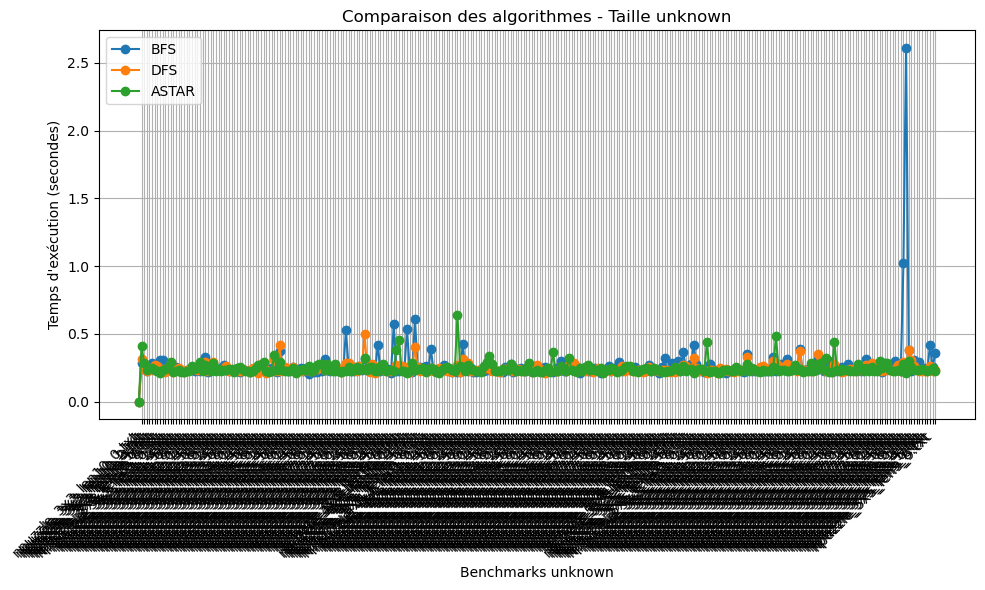

In [36]:
# Trier les tailles pour garder l'ordre logique
sizes = sorted(df["size"].unique(), key=lambda x: int(x[0]) if x != "unknown" else 0)

# Tracer les courbes par taille
for size in sizes:
    subset = df[df["size"] == size]
    if subset.empty:
        continue

    benchmarks = sorted(subset["benchmark"].unique())
    x_indices = list(range(1, len(benchmarks) + 1))

    plt.figure(figsize=(10, 6))
    for algo in subset["algorithm"].unique():
        algo_data = subset[subset["algorithm"] == algo]
        times = []
        for bench in benchmarks:
            row = algo_data[algo_data["benchmark"] == bench]
            if not row.empty:
                times.append(float(row.iloc[0]["time"]))
            else:
                times.append(None)
        # Ajouter le point (0, 0)
        x_with_origin = [0] + x_indices
        y_with_origin = [0] + times
        plt.plot(x_with_origin, y_with_origin, marker='o', label=algo.upper())

    # Configuration du graphique
    plt.xticks(x_indices, benchmarks, rotation=45, ha='right')
    plt.xlabel(f"Benchmarks {size}")
    plt.ylabel("Temps d'exécution (secondes)")
    plt.title(f"Comparaison des algorithmes - Taille {size}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()